In [1]:
from __future__ import division, print_function, absolute_import

# Import tflearn and some helpers

import tflearn
from tflearn.data_utils import shuffle
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.estimator import regression
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
import pickle
import scipy
import numpy as np
import argparse
import matplotlib.pyplot as plt

In [2]:
X, Y, X_test, Y_test = pickle.load(open("/home/faculty/millbr02/pub/full_dataset.pkl", "rb"), encoding = 'latin1')

# Shuffle the data
X, Y = shuffle(X, Y)


img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()


img_aug = ImageAugmentation()
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_blur(sigma_max=3.)


network = input_data(shape=[None, 32, 32, 3],
                     data_preprocessing=img_prep,
                     data_augmentation=img_aug)

# Step 1: Convolution
network = conv_2d(network, 32, 3, activation='relu')

# Step 2: Max pooling
network = max_pool_2d(network, 2)

# Step 3: Convolution again
network = conv_2d(network, 64, 3, activation='relu')

# Step 4: Convolution yet again
network = conv_2d(network, 64, 3, activation='relu')

# Step 5: Max pooling again
network = max_pool_2d(network, 2)

# Step 6: Fully-connected 512 node neural network
network = fully_connected(network, 512, activation='relu')

# Step 7: Dropout - throw away some data randomly during training to prevent over-fitting
network = dropout(network, 0.5)

# Step 8: Fully-connected neural network with two outputs (0=isn't a bird, 1=is a bird) to make the final prediction
network = fully_connected(network, 2, activation='softmax')


# Tell tflearn how we want to train the network
network = regression(network, optimizer='adam',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

# Wrap the network in a model object
model = tflearn.DNN(network, tensorboard_verbose=0, checkpoint_path='bird-classifier.tfl.ckpt')

model.load("bird-classifier.tfl")

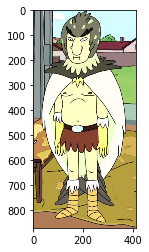

In [3]:
img = scipy.ndimage.imread("Birdperson.png")
plt.imshow(img)
plt.show()

In [4]:
#img = scipy.ndimage.imread("Birdperson.png")

img = scipy.misc.imresize(img, (32,32), interp="bicubic").astype(np.float32, casting = "unsafe")

prediciton = model.predict([img])

is_bird = np.argmax(prediciton[0]) == 1

if is_bird:
    print('This is a bird!')
else:
    print('This is not a bird!')

This is a bird!
